# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    url = f'https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        # Append the City information into city_data list
        city_data.append({"City": city_weather['name'], 
                          "Lat": city_weather["coord"]["lat"], 
                          "Lng": city_weather["coord"]["lon"], 
                          "Max Temp": city_weather["main"]["temp_max"],
                          "Humidity": city_weather["main"]["humidity"],
                          "Cloudiness": city_weather["clouds"]["all"],
                          "Wind Speed": city_weather["wind"]["speed"],
                          "Country": city_weather["sys"]["country"],
                          "Date": city_weather["dt"]})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jinji
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | osorno
Processing Record 4 of Set 1 | linhares
Processing Record 5 of Set 1 | tongling
Processing Record 6 of Set 1 | esperance
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | karera
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | te anau
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | san quintin
Processing Record 16 of Set 1 | margate
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | salalah
Processing Record 19 of Set 1 | zhangjiakou
Processing Record 20 of Set 1 | clyde river
Processing Record 21 of Set 1 | hasaki
Processing Record 2

Processing Record 39 of Set 4 | darovskoy
Processing Record 40 of Set 4 | bergen
Processing Record 41 of Set 4 | ugra
Processing Record 42 of Set 4 | san rafael
Processing Record 43 of Set 4 | inirida
Processing Record 44 of Set 4 | beringovskiy
Processing Record 45 of Set 4 | quatre cocos
Processing Record 46 of Set 4 | carnarvon
Processing Record 47 of Set 4 | san juan
Processing Record 48 of Set 4 | flinders
Processing Record 49 of Set 4 | san cristobal
Processing Record 0 of Set 5 | sofiysk
City not found. Skipping...
Processing Record 1 of Set 5 | minudasht
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | nokaneng
Processing Record 4 of Set 5 | oeiras do para
Processing Record 5 of Set 5 | haapiti
Processing Record 6 of Set 5 | orange cove
Processing Record 7 of Set 5 | coahuayana
Processing Record 8 of Set 5 | amderma
City not found. Skipping...
Processing Record 9 of Set 5 | sao miguel do araguaia
Processing Record 10 of Set 5 | walvis bay
Processing Record 11

Processing Record 26 of Set 8 | sheridan
Processing Record 27 of Set 8 | esna
Processing Record 28 of Set 8 | malanje
Processing Record 29 of Set 8 | lyubeshiv
City not found. Skipping...
Processing Record 30 of Set 8 | atambua
Processing Record 31 of Set 8 | moose factory
Processing Record 32 of Set 8 | iqaluit
Processing Record 33 of Set 8 | auki
Processing Record 34 of Set 8 | saurimo
Processing Record 35 of Set 8 | arrecife
Processing Record 36 of Set 8 | nanortalik
Processing Record 37 of Set 8 | iset
Processing Record 38 of Set 8 | port macquarie
Processing Record 39 of Set 8 | dom pedrito
Processing Record 40 of Set 8 | kaeo
Processing Record 41 of Set 8 | tiarei
Processing Record 42 of Set 8 | kuching
Processing Record 43 of Set 8 | luba
Processing Record 44 of Set 8 | maragogi
Processing Record 45 of Set 8 | alta floresta
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | laguna
Processing Record 48 of Set 8 | velikie luki
City not found. Skipping...
Pro

Processing Record 12 of Set 12 | dossor
Processing Record 13 of Set 12 | honningsvag
Processing Record 14 of Set 12 | nisia floresta
Processing Record 15 of Set 12 | sterling
Processing Record 16 of Set 12 | fort nelson
Processing Record 17 of Set 12 | jiuquan
Processing Record 18 of Set 12 | maldonado
Processing Record 19 of Set 12 | visby
Processing Record 20 of Set 12 | namibe
Processing Record 21 of Set 12 | rio gallegos
Processing Record 22 of Set 12 | constitucion
Processing Record 23 of Set 12 | mogadouro
Processing Record 24 of Set 12 | kulevcha
Processing Record 25 of Set 12 | sakakah
Processing Record 26 of Set 12 | shitanjing
Processing Record 27 of Set 12 | upata
Processing Record 28 of Set 12 | phan thiet
Processing Record 29 of Set 12 | thinadhoo
Processing Record 30 of Set 12 | mackay
Processing Record 31 of Set 12 | moerai
Processing Record 32 of Set 12 | butaritari
Processing Record 33 of Set 12 | voh
Processing Record 34 of Set 12 | shingu
Processing Record 35 of Set 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jinji,23.2281,110.8261,12.61,57,0,1.60,CN,1677442791
1,Ushuaia,-54.8000,-68.3000,12.81,58,75,2.06,AR,1677442792
2,Osorno,-40.5667,-73.1500,20.14,48,75,2.57,CL,1677442793
3,Linhares,-19.3911,-40.0722,28.54,61,11,4.72,BR,1677442793
4,Tongling,30.9500,117.7833,2.32,73,0,1.45,CN,1677442794


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Jinji,23.2281,110.8261,12.61,57,0,1.60,CN,1677442791
1,Ushuaia,-54.8000,-68.3000,12.81,58,75,2.06,AR,1677442792
2,Osorno,-40.5667,-73.1500,20.14,48,75,2.57,CL,1677442793
3,Linhares,-19.3911,-40.0722,28.54,61,11,4.72,BR,1677442793
4,Tongling,30.9500,117.7833,2.32,73,0,1.45,CN,1677442794


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

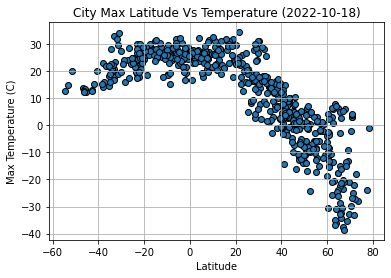

<Figure size 432x288 with 0 Axes>

In [17]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,marker='o',edgecolor ='black')
plt.title("City Max Latitude Vs Temperature (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
plt.show()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

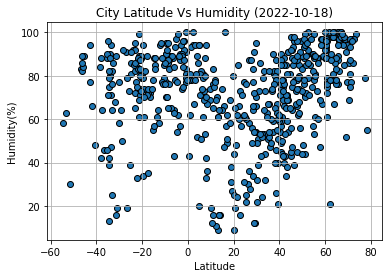

<Figure size 432x288 with 0 Axes>

In [18]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,marker='o',edgecolor ='black')
plt.title("City Latitude Vs Humidity (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid(True)
plt.show()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

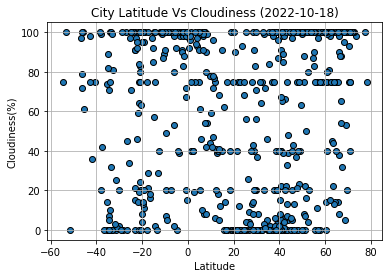

<Figure size 432x288 with 0 Axes>

In [19]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,marker='o',edgecolor ='black')
plt.title("City Latitude Vs Cloudiness (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(True)
plt.show()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

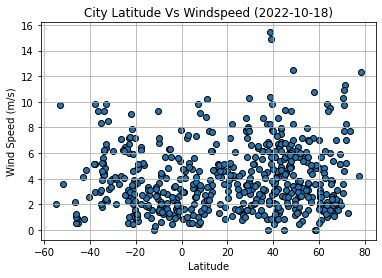

<Figure size 432x288 with 0 Axes>

In [20]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,marker='o',edgecolor ='black')
plt.title("City Latitude Vs Windspeed (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      3.986601
1      3.464463
2      3.559708
3      3.701408
4      4.038274
         ...   
564    3.756179
565    4.199878
566    4.191566
567    4.254643
568    3.973587
Name: Lat, Length: 569, dtype: float64


In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]
                                      
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Jinji,23.2281,110.8261,12.61,57,0,1.60,CN,1677442791
4,Tongling,30.9500,117.7833,2.32,73,0,1.45,CN,1677442794
7,Nikolskoye,59.7035,30.7861,-4.06,88,100,4.93,RU,1677442796
8,Karera,25.4667,78.1500,20.71,25,100,1.50,IN,1677442797
12,San Quintín,30.4833,-115.9500,13.81,51,8,6.63,MX,1677442799


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Ushuaia,-54.8000,-68.3000,12.81,58,75,2.06,AR,1677442792
2,Osorno,-40.5667,-73.1500,20.14,48,75,2.57,CL,1677442793
3,Linhares,-19.3911,-40.0722,28.54,61,11,4.72,BR,1677442793
5,Esperance,-33.8667,121.9000,17.14,80,100,4.41,AU,1677442795
6,Bredasdorp,-34.5322,20.0403,19.05,75,7,4.40,ZA,1677442795


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.73


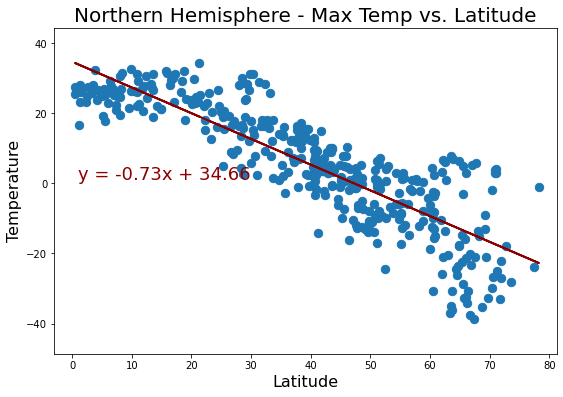

In [65]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[70])
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Temperature', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')


# Set the limits of the y axis:
plt.ylim(min(northern_hemi_df['Max Temp'])-10, max(northern_hemi_df['Max Temp'])+10)

# Set the limits of the x axis:
plt.xlim(-3, max(northern_hemi_df['Lat'])+3)

# Print r-value value:
print(f'The r-value is: {round(rvalue**2,2)}')

# Save the figure:
#plt.savefig('output_data/City Latitude vs. MaxTemp_North.png')

# Show plot:
plt.show()

The r-value is:0.31125455306998095


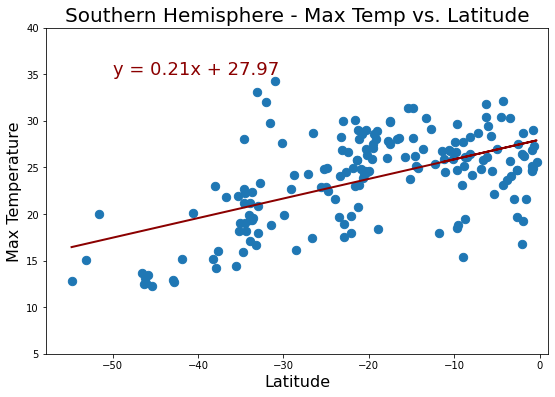

In [66]:
# Linear regression on Southern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[70])
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-50,35),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(5,40)

# Set the limits of the x axis:
plt.xlim(min(southern_hemi_df['Lat'])-3, +1)

# Print r-value value:
print(f'The r-value is:{rvalue**2}')

# Save the figure:
#plt.savefig('output_data/City Latitude vs. MaxTemp_South.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** There is a positive correlation between temperature and latitude on the Southern Hemisphere. The closer to the equator is a city position the higher is its maximum temperature. The variance of the temperature on the Southern Hemisphere is higher than one on the Northern Hemisphere .In addition,there is a broader temperature variation for different cities positioned on the same latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.18027756034651068


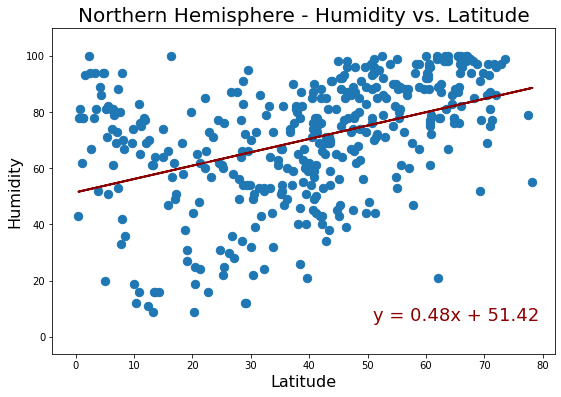

In [68]:
# Northern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o',s=[70])
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity vs. Latitude', fontsize=20)
plt.ylabel('Humidity', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-6, 110)

# Set the limits of the x axis:
plt.xlim(-4, 82)

# Print r-value value:
print(f'The r-value is: {rvalue**2}')

# Save the figure:
#plt.savefig('output_data/City Latitude vs. Humidity_North.png')

# Show plot:
plt.show()

The r-value is: 0.07443967924595027


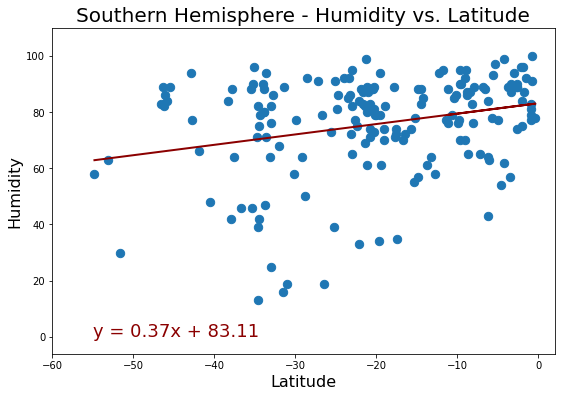

In [76]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o',s=[70])
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity vs. Latitude', fontsize=20)
plt.ylabel('Humidity', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-55,0),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-6, 110)

# Set the limits of the x axis:
plt.xlim(-60, 2)

# Print r-value value:
print(f'The r-value is: {rvalue**2}')

# Save the figure:
#plt.savefig('output_data/City Latitude vs. Humidity_North.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** There is almost no correlation between humidity level and city position moving south from equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.042835083898610925


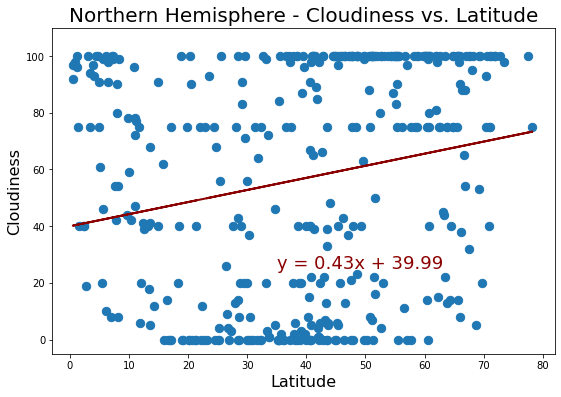

In [77]:
#Northern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[70])
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-5, 110)

# Set the limits of the x axis:
plt.xlim(-3, 82)

# Print r-value value:
print(f'The r-value is: {rvalue**2}')

# Save the figure:
#plt.savefig('output_data/City Latitude vs. Cloudiness_North.png')

# Show plot:
plt.show()

The r-value is: 0.07299178483775011


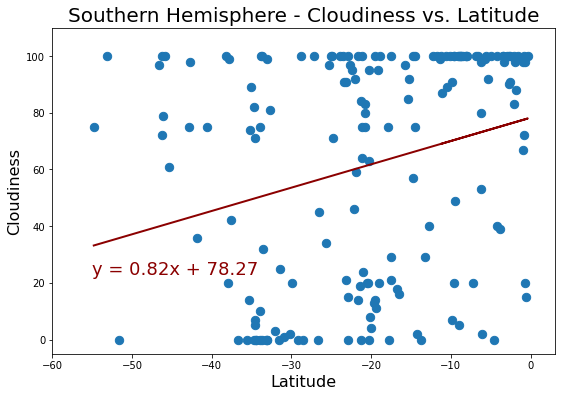

In [84]:
#Southern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[70])
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-55,23), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-5, 110)

# Set the limits of the x axis:
plt.xlim(-60,3)

# Print r-value value:
print(f'The r-value is: {rvalue**2}')

# Save the figure:
#plt.savefig('output_data/City Latitude vs. Cloudiness_North.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** There is no correlation between the cloudiness level and a latitude on the Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0041735492599071985


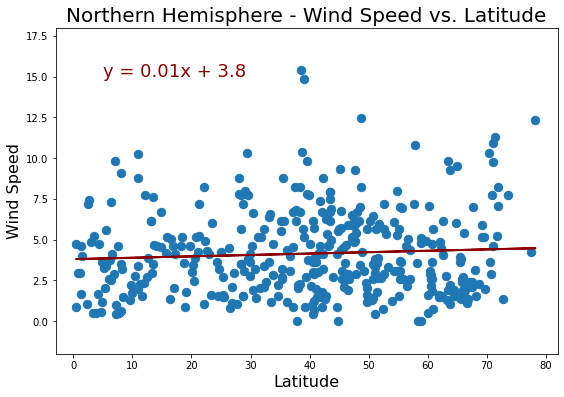

In [92]:
# Northern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[70])
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(5,15), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-2, 18)

# Set the limits of the x axis:
plt.xlim(-3, 82)

# Print r-value value:
print(f'The r-value is: {rvalue**2}')

# Save the figure:
#plt.savefig('output_data/City Latitude vs. Cloudiness_North.png')

# Show plot:
plt.show()

The r-value is: 0.0509178885473633


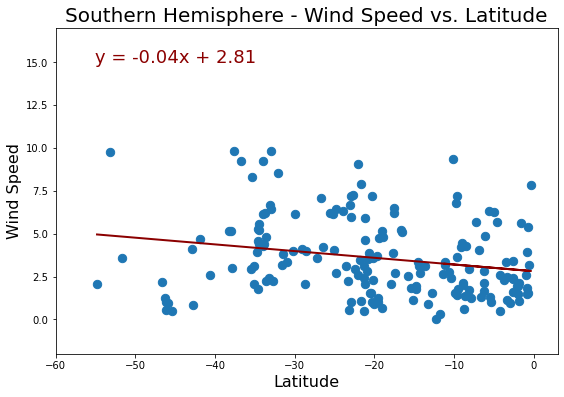

In [93]:
# Southern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[70])
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-55,15), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-2, 17)

# Set the limits of the x axis:
plt.xlim(-60, 3)

# Print r-value value:
print(f'The r-value is: {rvalue**2}')

# Save the figure:
#plt.savefig('output_data/City Latitude vs. Cloudiness_North.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** There is very low correlation between the wind speed and a latitude on the Southern Hemisphere. The wind speed lightly increases going farther south away from the equator.